In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astroquery.gaia import Gaia
from matplotlib.colors import LogNorm

## GAIA Query of the SMC central region 

In [24]:
query = f"""SELECT TOP 50000
ra, dec, phot_g_mean_mag AS g, phot_bp_mean_mag - phot_rp_mean_mag AS bp_rp, pmra, pmdec
FROM gaiadr3.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),
	BOX('ICRS',15,-73.5,10,3)
)=1
"""
job     = Gaia.launch_job_async(query)
results = job.get_results()
print(f'Table size (rows): {len(results)}')
df=results.to_pandas()
df

INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 50000


,ra,dec,g,bp_rp,pmra,pmdec
0,10.000007,-73.570919,19.697985,NaN,5.766705,3.052990
1,10.000017,-72.177715,21.199585,0.327768,NaN,NaN
2,10.000017,-73.645574,19.120581,1.200703,0.378739,-1.358102
3,10.000018,-72.222140,19.832945,0.735868,-1.630363,-7.325032
4,10.000018,-73.336894,19.704546,0.793568,1.023783,-1.185814
...,...,...,...,...,...,...
49995,10.241904,-74.479541,20.454321,0.138729,0.542552,-0.727628
49996,10.241911,-72.812351,19.117567,0.980022,0.972075,-1.827959
49997,10.241921,-72.703563,20.304398,0.019333,0.567495,0.061832
49998,10.241924,-72.940316,19.420774,0.945793,0.643164,-0.761264


In [31]:
df

,source_id,designation,ra,dec,l,b,ecl_lon,ecl_lat,parallax,pmra,...,dr2_radial_velocity,dr2_radial_velocity_error,g_rp,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_rp_mean_flux,phot_rp_mean_flux_error,ref_epoch
0,4689021852407657088,Gaia EDR3 4689021852407657088,11.790976,-72.679738,303.377473,-44.444814,311.977272,-64.168359,-0.014721,0.707412,...,NaN,NaN,0.683296,326.847121,8.750443,591.413651,1.038764,467.112255,11.537522,2016.0
1,4689021852474045184,Gaia EDR3 4689021852474045184,11.790879,-72.678665,303.377549,-44.445886,311.979443,-64.167852,0.135862,0.841652,...,NaN,NaN,0.544071,150.904488,4.994456,336.323315,0.860905,233.666795,4.746223,2016.0
2,4689021856703442304,Gaia EDR3 4689021856703442304,11.788516,-72.680609,303.378470,-44.443927,311.974732,-64.168095,0.007027,1.043612,...,NaN,NaN,0.744785,294.244217,7.702746,503.765291,1.137573,421.069072,7.709671,2016.0
3,4689021856734348928,Gaia EDR3 4689021856734348928,11.787758,-72.680028,303.378806,-44.444502,311.975691,-64.167633,0.157598,1.217904,...,NaN,NaN,NaN,NaN,NaN,189.010253,0.860014,NaN,NaN,2016.0
4,4689021921130509824,Gaia EDR3 4689021921130509824,11.775372,-72.677007,303.384069,-44.447436,311.978086,-64.162982,-0.071175,0.668789,...,NaN,NaN,0.650373,192.913134,4.109561,391.563534,0.922485,300.029201,6.011741,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770209,4684853225863576064,Gaia EDR3 4684853225863576064,14.877228,-74.332508,302.189598,-42.784107,309.255879,-65.640233,0.088000,0.658017,...,NaN,NaN,0.576344,178.636368,5.855592,370.599697,0.983417,265.248902,6.199429,2016.0
770210,4684853225863602176,Gaia EDR3 4684853225863602176,14.915912,-74.328632,302.175147,-42.787529,309.273813,-65.648568,-0.044956,0.935238,...,NaN,NaN,0.564659,272.782447,5.522625,546.970083,1.031067,387.291946,4.734890,2016.0
770211,4684853225863602304,Gaia EDR3 4684853225863602304,14.907914,-74.328274,302.178067,-42.787981,309.272726,-65.646424,-0.114274,0.686174,...,NaN,NaN,0.587557,177.483436,5.501092,383.178355,0.856523,277.099076,5.325630,2016.0
770212,4684853225863619328,Gaia EDR3 4684853225863619328,14.901654,-74.326186,302.180246,-42.790140,309.275960,-65.644092,-0.040896,0.929213,...,NaN,NaN,0.611860,749.470733,5.200512,1579.719741,1.371231,1168.250395,5.487745,2016.0


In [32]:
# Open The  Dataframe
df=pd.read_csv('GaiaDR3_SMC_centralregion.csv')
# Keep only the collumns that we will use
df=pd.DataFrame({'ra':df.ra,'dec':df.dec,'pmra':df.pmra,'pmdec':df.pmdec,'g':df.phot_g_mean_mag,'bp_rp':df.bp_rp})
print(df.head(10))

          ra        dec      pmra     pmdec          g     bp_rp
0  11.790976 -72.679738  0.707412 -1.531314  18.757639  0.978338
1  11.790879 -72.678665  0.841652 -1.285031  19.370474  1.065384
2  11.788516 -72.680609  1.043612 -1.465123  18.931797  0.979761
3  11.787758 -72.680028  1.217904 -0.564110  19.996153       NaN
4  11.775372 -72.677007  0.668789 -1.087282  19.205360  1.070150
5  11.783373 -72.673549  0.905480 -0.968503  18.445251  0.916792
6  11.790482 -72.673976  0.981220 -0.729978  19.938670       NaN
7  11.789941 -72.673410  0.676133 -1.252244  18.391277  1.037748
8  11.768851 -72.680920  1.023531 -1.449025  19.669510 -0.036043
9  11.767516 -72.674682  1.127806  0.812606  20.276104  0.294180


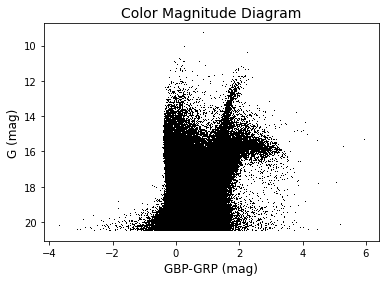

In [33]:
plt.figure(1)
plt.title('Color Magnitude Diagram',fontsize='14')
plt.plot(df.bp_rp,df.g,'k,')
plt.xlabel('GBP-GRP (mag)',fontsize='12')
plt.ylabel('G (mag)', fontsize='12')
plt.gca().invert_yaxis()
plt.show()

### Estimate X and Y based on the center of (13.04, -73.10)

In [34]:
mra=13.04
mdec=-73.10
#  Correct to X (projection) assuming a center with ra=13.04 deg
df['X']=np.cos(np.pi*df['dec']/180)*np.sin(np.pi*(df['ra']-mra)/180)*(180/np.pi)
#  Correct to Y (projection) assuming a center with dec=-73.10
df['Y']=(np.sin(np.pi*df['dec']/180)*np.cos(np.pi*(mdec)/180)-np.cos(np.pi*df['dec']/180)*np.sin(np.pi*(mdec)/180)*np.cos(np.pi*(df['ra']-mra)/180))*(180/np.pi)
df.head()

,ra,dec,pmra,pmdec,g,bp_rp,X,Y
0,11.790976,-72.679738,0.707412,-1.531314,18.757639,0.978338,-0.371821,0.416380
1,11.790879,-72.678665,0.841652,-1.285031,19.370474,1.065384,-0.371872,0.417452
2,11.788516,-72.680609,1.043612,-1.465123,18.931797,0.979761,-0.372535,0.415494
3,11.787758,-72.680028,1.217904,-0.564110,19.996153,NaN,-0.372772,0.416071
4,11.775372,-72.677007,0.668789,-1.087282,19.205360,1.070150,-0.376522,0.419013


#### Bin the data on a sky grid
We bin our data in a 9x9 grid on the sky and estimate the average of `pmra` and `pmdec` on the grid

In [35]:
# Create a grid with number of boxes: binsx*binsy
Binsx=9 
Binsy=9

# Make two lists with the centers of each box
dx=np.linspace(min(df.X),max(df.X),Binsx)
dy=np.linspace(min(df.Y),max(df.Y),Binsy)

# Calculate the density
nc=20 # number of isodensity contours
X_,Y_=np.meshgrid(dx,dy)
counts,xbins,ybins=np.histogram2d(df.X,df.Y,bins=nc,normed=LogNorm())

df1=pd.DataFrame()
df1['bins0']=pd.cut(df['X'],Binsx)
df1['bins1']=pd.cut(df['Y'],Binsy)

# We estimate the means values of each box of the grid
means1=df.join(df1).groupby(list(df1)).mean()
means1=means1.unstack(level=0)

means11=means1['pmra'].values
means12=means1['pmdec'].values

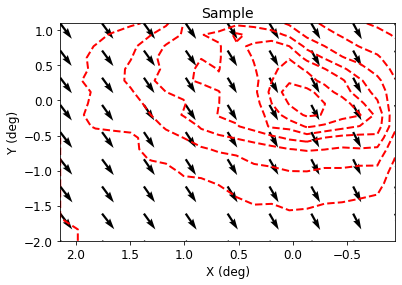

In [36]:
# Create a map of isodensity contours with vectors based on mean values of  pmra and pmdec
plt.figure(1)
plt.title('Sample',fontsize='14')
plt.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=2,colors='red',
    linestyles='--')
plt.quiver(X_,Y_,means11,means12)
plt.xlabel('X (deg)',fontsize='12')
plt.ylabel('Y (deg)', fontsize='12')
plt.tick_params(labelsize='12')
plt.gca().invert_xaxis()

plt.show()